<a href="https://colab.research.google.com/github/Nisha-sah/Concepts-and-Technologies-of-AI/blob/main/WLVID_PragyaKumariSah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Problem 1
Basic Data Exploration & Trend Visualization
3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

Import library, read  dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset = pd.read_csv(
    "/content/drive/MyDrive/Human_Development_Index_Dataset .csv",
    encoding="latin1"
)
# Identify unique years
dataset['year'].unique()



array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
# Filter dataset for 2022
hdi_2022_df = dataset[dataset['year'] == 2022].copy()
print("Filtered dataset to include only observations from the year 2022.")


# Save for further use
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)
# 2. Basic Exploration

print("\nFirst 10 rows of 2022 dataset:\n", hdi_2022_df.head(10))
print("\nNumber of rows and columns:", hdi_2022_df.shape)
print("\nColumn names and data types:")
hdi_2022_df.info()

Filtered dataset to include only observations from the year 2022.

First 10 rows of 2022 dataset:
      Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_developmen

In [ ]:


# Replace special characters like "–" with NaN
hdi_2022_df.replace("–", np.nan, inplace=True)

# Convert numeric columns
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce')

# Check duplicates
print("\nNumber of duplicate rows:", hdi_2022_df.duplicated().sum())

# Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()
print("Number of rows after removing duplicates:", hdi_2022_df.shape[0])



Number of duplicate rows: 0
Number of rows after removing duplicates: 206


In [ ]:
# 3. Missing
print("\nMissing values per column:\n", hdi_2022_df.isnull().sum())



Missing values per column:
 Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int6

In [ ]:
# 4. Basic Statistics

mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print(f"\nHDI Statistics for 2022:\nMean: {mean_hdi:.4f}\nMedian: {median_hdi:.4f}\nStandard Deviation: {std_hdi:.4f}")

# Highest and Lowest HDI
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]

print("\nCountry with Highest HDI:", highest_hdi_country.to_dict())
print("Country with Lowest HDI:", lowest_hdi_country.to_dict())

# 5. Filtering and Sorting

high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by Gross National Income per capita in descending order
high_hdi_sorted_df = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)
high_hdi_sorted_df.head(10)



HDI Statistics for 2022:
Mean: 0.7229
Median: 0.7395
Standard Deviation: 0.1530

Country with Highest HDI: {'country': 'Switzerland', 'hdi': 0.967}
Country with Lowest HDI: {'country': 'Somalia', 'hdi': 0.38}


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


Adding HDI Category Column:

In [ ]:
import pandas as pd
import numpy as np

# HDI classification function
def classify_hdi(hdi):
    if pd.isna(hdi):
        return np.nan
    elif hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"

# Apply the function (OUTSIDE the function definition)
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Print output
print(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head())


         country    hdi HDI_Category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
131      Andorra  0.884    Very High
164       Angola  0.591       Medium


In [ ]:
# Save final CSV
save_path = "/content/drive/MyDrive/AI Assessment"
hdi_2022_df.to_csv("/content/drive/MyDrive/HDI_2022.csv", index=False)

3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

In [ ]:
#Task1

hdi_2020_2022_df = dataset[dataset['year'].isin([2020, 2021, 2022])].copy()


hdi_2020_2022_df.to_csv(save_path +'HDI_problem1B.csv', index=False)



print(hdi_2020_2022_df.head())

    Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30          31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31          32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32          33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63          64  ALB      Albania  2020  0.784           76.989      2.866849   
64          65  ALB      Albania  2021  0.785           76.463      2.854710   

       hdi_f     hdi_m  life_expec_f  ...  gender_development  \
30  0.381373  0.548741        65.432  ...               0.695   
31  0.379129  0.528559        65.279  ...               0.717   
32  0.332443  0.534145        66.213  ...               0.622   
63  0.775404  0.793220        79.676  ...               0.978   
64  0.777866  0.792942        79.173  ...               0.981   

    gender_inequality  secondary_education_f_%  secondary_education_m_%  \
30              0.674                 6.092345       

Data Cleaning:

In [ ]:
#Check for Missing  values
missing_values = hdi_2020_2022_df[['country', 'year', 'hdi']].isnull().sum()
print("Missing values")
print(missing_values)

# Standardize country names
hdi_2020_2022_df['country'] = hdi_2020_2022_df['country'].str.strip()

# Replace non-numeric symbols
hdi_2020_2022_df.replace("–", np.nan, inplace=True)

# Convert HDI to numeric
hdi_2020_2022_df['hdi'] = pd.to_numeric(hdi_2020_2022_df['hdi'], errors='coerce')

# Remove rows with missing essential values
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['country', 'year', 'hdi'])

# Remove duplicate rows
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()


hdi_2020_2022_df.to_csv('HDI_problem1B.csv', index=False)
print("Cleaned dataset saved successfully.")


print("Cleaned dataset shape:", hdi_2020_2022_df.shape)
print(hdi_2020_2022_df.head(10))


hdi_change_df = hdi_2020_2022_df.groupby('country')['hdi'].agg(['first','last']).assign(
    Change=lambda x: x['last'] - x['first']
).sort_values('Change', ascending=False).head(10)





Missing values
country    0
year       0
hdi        8
dtype: int64
Cleaned dataset saved successfully.
Cleaned dataset shape: (610, 30)
     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30           31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31           32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63           64  ALB      Albania  2020  0.784           76.989      2.866849   
64           65  ALB      Albania  2021  0.785           76.463      2.854710   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
96           97  DZA      Algeria  2020  0.730           74.453     43.451666   
97           98  DZA      Algeria  2021  0.740           76.377     44.177968   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
129         130  AND      Andorra  2020  0.843        

Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):

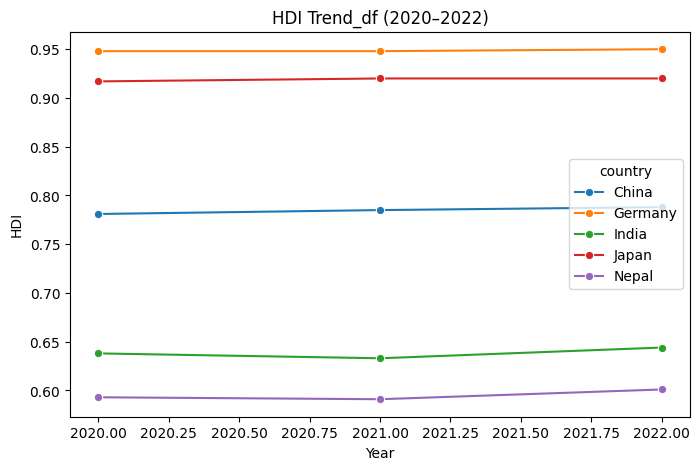

In [ ]:
selected_countries = ['Nepal', 'India', 'China', 'Japan', 'Germany']

trend_df = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(selected_countries)]

# Create the line chart
plt.figure(figsize=(8, 5))

sns.lineplot(data=trend_df, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend_df (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

B. Generate Visualizations:

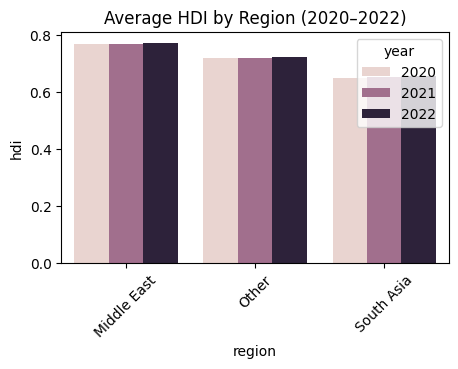

In [ ]:
#Bar Chart
sa_list = ["Afghanistan","Bhutan", "Bangladesh","India", "Maldives", "Nepal", "Sri Lanka"]
me_list = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
           "Palestine", "Turkey" "Saudi Arabia", "United Arab Emirates", "Yemen"]

def assign_region(country):
    if country in sa_list:
        return 'South Asia'
    elif country in me_list:
        return 'Middle East'
    else:
        return 'Other'
hdi_2020_2022_df['region'] = hdi_2020_2022_df['country'].apply(assign_region)

region_avg = hdi_2020_2022_df.groupby(['region','year'])['hdi'].mean().reset_index()

plt.figure(figsize=(5,3))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.show()

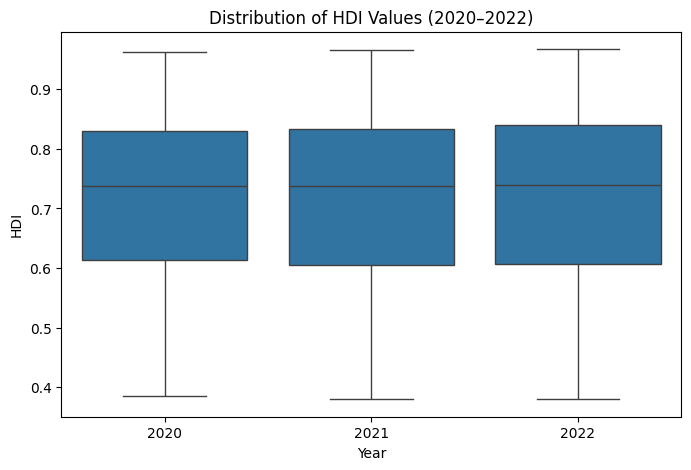

In [ ]:
#box plotter

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=hdi_2020_2022_df,
    x='year',
    y='hdi'
)

plt.title("Distribution of HDI Values (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


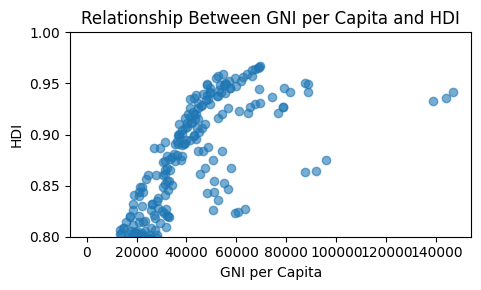

In [ ]:
#Scatter Plot: HDI vs. GNI per Capita

import matplotlib.pyplot as plt
import seaborn as sns

if "gross_inc_percap" in hdi_2020_2022_df.columns:
    plt.figure(figsize=(5,3))
    plt.scatter(hdi_2020_2022_df["gross_inc_percap"],hdi_2020_2022_df["hdi"],alpha=0.6)
    plt.title("Relationship Between GNI per Capita and HDI")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.ylim(0.8,1)
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")

In [ ]:
hdi_2020_2022_df.groupby('country')['hdi'].agg(['first','last']).assign(Change=lambda x: x['last']-x['first']).sort_values('Change', ascending=False).head()

,first,last,Change
country,,,
Andorra,0.843,0.884,0.041
Azerbaijan,0.722,0.760,0.038
Ecuador,0.734,0.765,0.031
Maldives,0.737,0.762,0.025
Mexico,0.757,0.781,0.024


In [ ]:
save_path = "/content/drive/MyDrive/AI Assessment"
hdi_2022_df.to_csv("/content/drive/MyDrive/HDI_2022.csv", index=False)


1.Three countries show the greatest HDI improvement like:Andorra(0.041), Azerbaijan(0.038), Ecuador(0.031)

2.Looking at the current table, all the countries with the biggest changes show improvement, so none of the top performers experienced a decline
3.Highest average HDI: Middle east and lowest average HDI: South Asia

4.COVID-19 pandemic:
Slowed human development, especially in lower-HDI regions, but by 2022, most countries were showing signs of recovery. This highlights how global crises can affect development differently depending on a country's resources and systems.



4 Problem 2:Advanced HDI Exploration

In [ ]:
# Task 1: Create South Asia Subset
# Task-1: Tasks 1

South_asia_list = ["Afghanistan", "Bangladesh", "Bhutan", "India",
           "Maldives", "Nepal", "Pakistan", "Sri Lanka"]


hdi_south_asia = dataset[dataset['country'].isin(sa_list)].copy()

# Save filtered dataset
hdi_south_asia.to_csv("/content/HDI_SouthAsia.csv", index=False)

print("New Data sucessfully")

New Data sucessfully


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons', 'Composite_Score'],
      dtype='object')


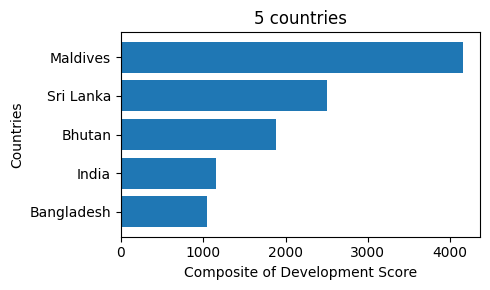

In [ ]:
#Tasks 2

print(hdi_south_asia.columns)
hdi_south_asia['Composite_Score'] = (
    0.30 * hdi_south_asia['life_expectancy'] +
    0.30 * hdi_south_asia['gross_inc_percap']
)

country_composite = (
    hdi_south_asia.groupby("country", as_index=False)
    .agg({"Composite_Score": "mean", "hdi": "mean"})
)

composite_ranking = country_composite.sort_values(by="Composite_Score", ascending=False)
top5 = composite_ranking.head(5)

plt.figure(figsize=(5,3))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite of Development Score")
plt.ylabel("Countries")
plt.title("5 countries")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


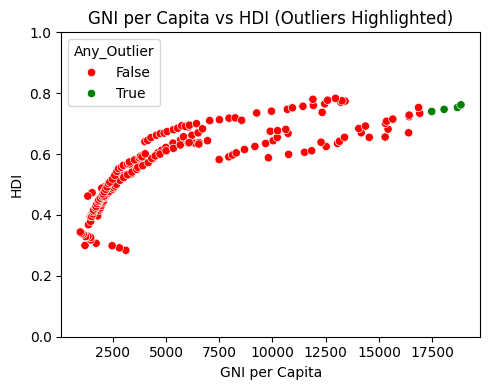

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection function (IQR method)
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


hdi_south_asia['HDI_Outlier'] = detect_outliers(hdi_south_asia['hdi'])
hdi_south_asia['GNI_Outlier'] = detect_outliers(hdi_south_asia['gross_inc_percap'])


hdi_south_asia['Any_Outlier'] = hdi_south_asia['HDI_Outlier'] | hdi_south_asia['GNI_Outlier']


plt.figure(figsize=(5,4))
sns.scatterplot(
    data=hdi_south_asia,
    x="gross_inc_percap",
    y="hdi",
    hue="Any_Outlier",
    palette={False: "red", True: "green"}
)
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


Pearson correlation between gender_development and HDI: 0.871
Pearson correlation between life_expectancy and HDI: 0.959


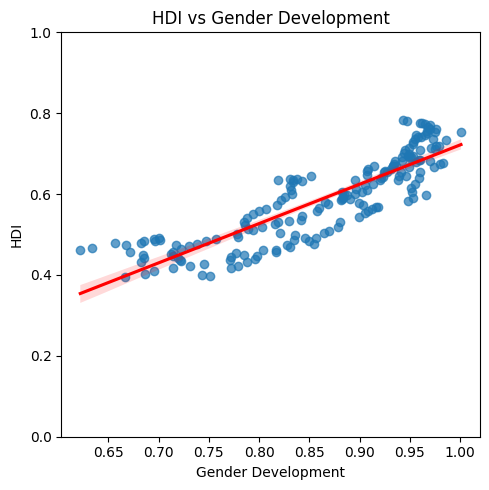

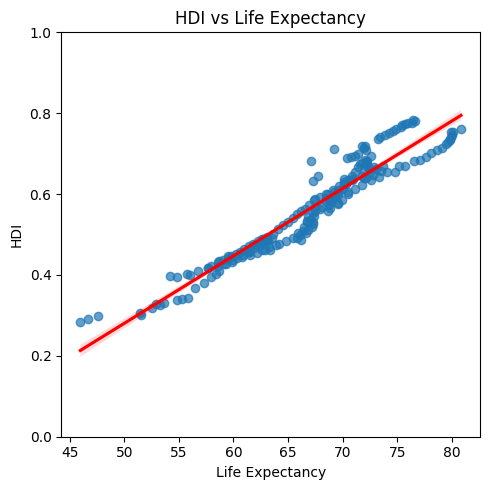

In [ ]:
#Task4

metrics = ["gender_development", "life_expectancy"]

for metric in metrics:
    corr = hdi_south_asia[metric].corr(hdi_south_asia["hdi"])
    print(f"Pearson correlation between {metric} and HDI: {corr:.3f}")

for metric in metrics:
    plt.figure(figsize=(5,5))
    sns.regplot(
        data=hdi_south_asia,
        x=metric,
        y="hdi",
        scatter_kws={"alpha":0.7},
        line_kws={"color":"red"}
    )
    plt.title(f"HDI vs {metric.replace('_', ' ').title()}")
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

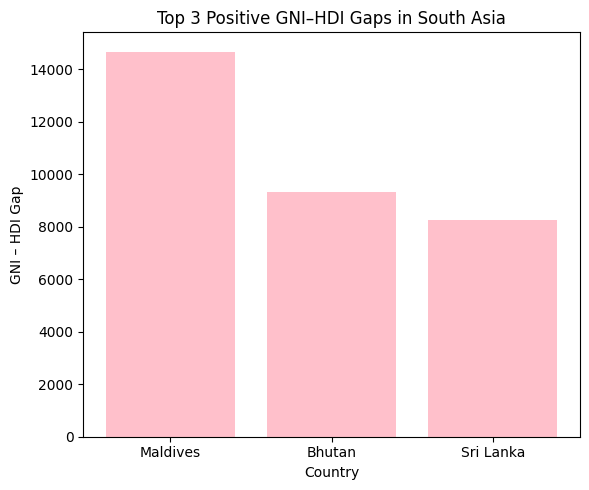

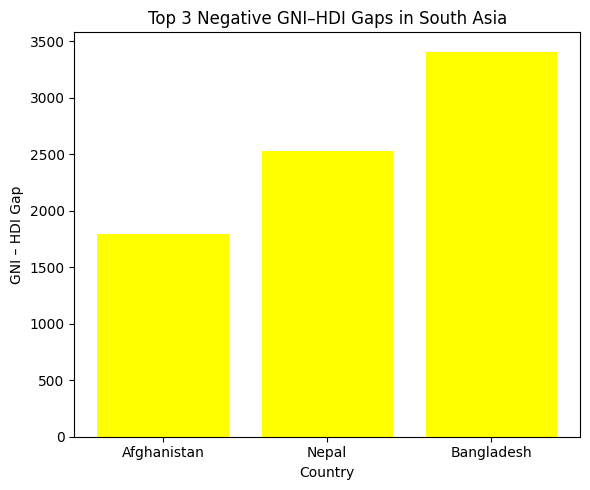

In [ ]:
#Task5

hdi_south_asia = hdi_south_asia.copy()
hdi_south_asia["GNI_HDI_Gap"] = hdi_south_asia["gross_inc_percap"] - hdi_south_asia["hdi"]
gap_summary = hdi_south_asia.groupby("country", as_index=False).agg({
    "GNI_HDI_Gap": "mean"
})

top_positive_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=False).head(3)
top_negative_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=True).head(3)

plt.figure(figsize=(6,5))
plt.bar(top_positive_gaps["country"], top_positive_gaps["GNI_HDI_Gap"], color="pink")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Positive GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.bar(top_negative_gaps["country"], top_negative_gaps["GNI_HDI_Gap"], color="yellow")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Negative GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()


5 Problem 3:Comparative Regional Analysis: South Asia vs Middle East


In [ ]:
#Tasks:1
import os
import pandas as pd


folder_path = "/content/drive/MyDrive/AI Assessment"
os.makedirs(folder_path, exist_ok=True)


south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter dataset for 2020-2022
hdi_2022_df = dataset[dataset["year"].isin([2020, 2021, 2022])]

# Filter by regions
dataset_sa = hdi_2022_df[hdi_2022_df["country"].isin(south_asia)]
dataset_me = hdi_2022_df[hdi_2022_df["country"].isin(middle_east)]

# Save CSVs safely
dataset_sa.to_csv(f"{folder_path}/HDI_SouthAsia_2020_2022.csv", index=False)
dataset_me.to_csv(f"{folder_path}/HDI_MiddleEast_2020_2022.csv", index=False)

print("South Asia and Middle East subsets saved successfully.")


South Asia and Middle East subsets saved successfully.


In [ ]:
sa_mean = dataset_sa["hdi"].mean()
sa_std = dataset_sa["hdi"].std()

me_mean = dataset_me["hdi"].mean()
me_std = dataset_me["hdi"].std()

print("South Asia HDI - Mean:", round(sa_mean, 4), "Std Dev:", round(sa_std, 4))
print("Middle East HDI - Mean:", round(me_mean, 4), "Std Dev:", round(me_std, 4))

if sa_mean > me_mean:
    print("South Asia performs better on average in HDI.")
elif me_mean > sa_mean:
    print("Middle East performs better on average in HDI.")
else:
    print("Both regions have the same average HDI.")

South Asia HDI - Mean: 0.6396 Std Dev: 0.0983
Middle East HDI - Mean: 0.7889 Std Dev: 0.1413
Middle East performs better on average in HDI.


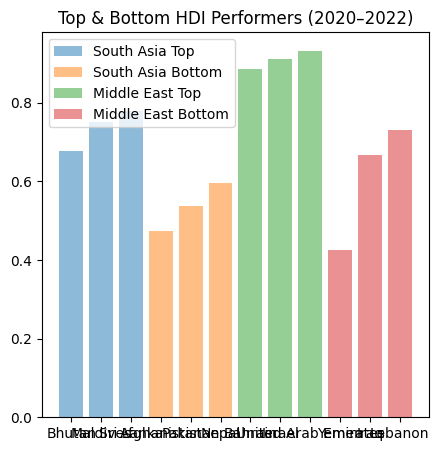

In [ ]:
#Task3
sa_avg = dataset_sa.groupby("country")["hdi"].mean().sort_values()
me_avg = dataset_me.groupby("country")["hdi"].mean().sort_values()
sa_bottom3, sa_top3 = sa_avg.head(3), sa_avg.tail(3)
me_bottom3, me_top3 = me_avg.head(3), me_avg.tail(3)
plt.figure(figsize=(5,5))
plt.bar(sa_top3.index, sa_top3.values, label="South Asia Top", alpha=0.5)
plt.bar(sa_bottom3.index, sa_bottom3.values, label="South Asia Bottom", alpha=0.5)
plt.bar(me_top3.index, me_top3.values, label="Middle East Top", alpha=0.5)
plt.bar(me_bottom3.index, me_bottom3.values, label="Middle East Bottom", alpha=0.5)
plt.legend()
plt.title("Top & Bottom HDI Performers (2020–2022)")
plt.show()


In [ ]:
#Task5
sa_range = dataset_sa["hdi"].max() - dataset_sa["hdi"].min()
me_range = dataset_me["hdi"].max() - dataset_me["hdi"].min()

sa_cv = sa_std / sa_means
me_cv = me_std / me_means

print("South Asia Range:", sa_range, "CV:", sa_cv)
print("Middle East Range:", me_range, "CV:", me_cv)


South Asia Range: 0.321 CV: gender_development    0.111489
life_expectancy       0.001385
gross_inc_percap      0.000013
dtype: float64
Middle East Range: 0.5130000000000001 CV: gender_development    0.157599
life_expectancy       0.001863
gross_inc_percap      0.000004
dtype: float64


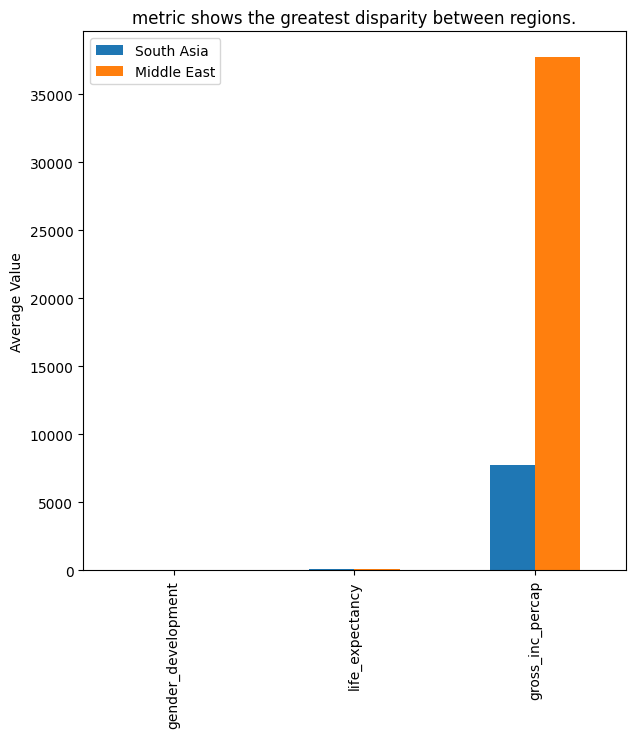

In [ ]:
#Tasks :4
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_means = dataset_sa[metrics].mean()
me_means = dataset_me[metrics].mean()

comparison = pd.DataFrame({
    "South Asia": sa_means,
    "Middle East": me_means
})

comparison.plot(kind="bar", figsize=(7,7))
plt.title("metric shows the greatest disparity between regions.")
plt.ylabel("Average Value")
plt.show()



South Asia correlations:
gender_development vs HDI: 0.874


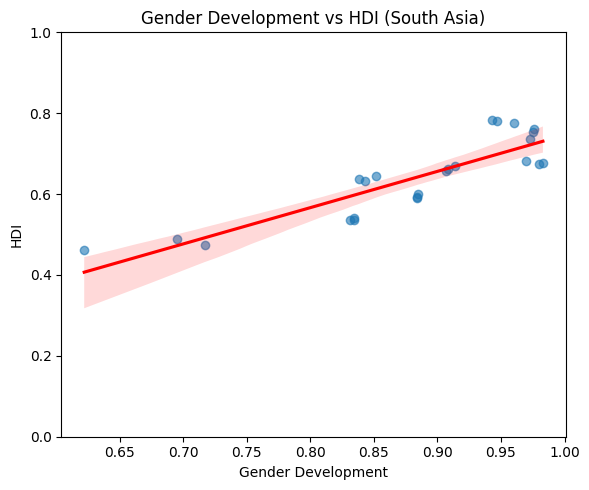

life_expectancy vs HDI: 0.939


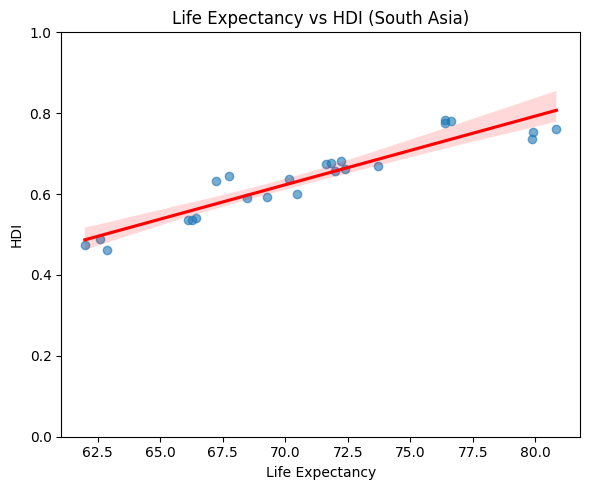


Middle East correlations:
gender_development vs HDI: 0.936


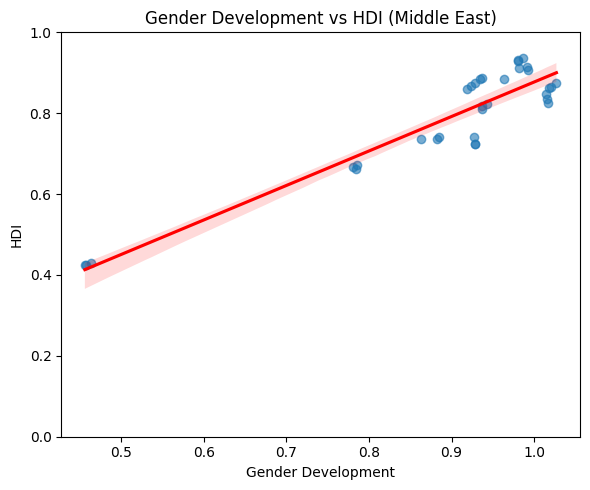

life_expectancy vs HDI: 0.933


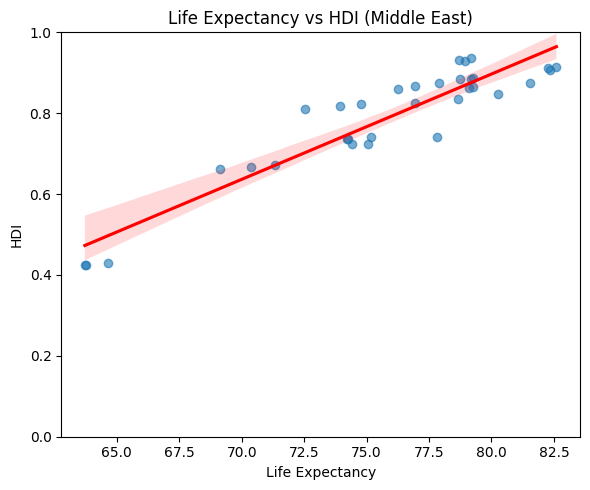

In [ ]:
#Task6



metrics_corr = ["gender_development", "life_expectancy"]

for region_name, df in [("South Asia", dataset_sa), ("Middle East", dataset_me)]:
    print(f"\n{region_name} correlations:")
    for metric in metrics_corr:
        corr = df[metric].corr(df["hdi"])
        print(f"{metric} vs HDI: {corr:.3f}")

        plt.figure(figsize=(6,5))
        sns.regplot(
            data=df,
            x=metric,
            y="hdi",
            scatter_kws={"alpha":0.6},
            line_kws={"color":"red"}
        )
        plt.title(f"{metric.replace('_',' ').title()} vs HDI ({region_name})")
        plt.xlabel(metric.replace("_"," ").title())
        plt.ylabel("HDI")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()



South Asia - Total Outliers: 0


,country,year,hdi,gross_inc_percap


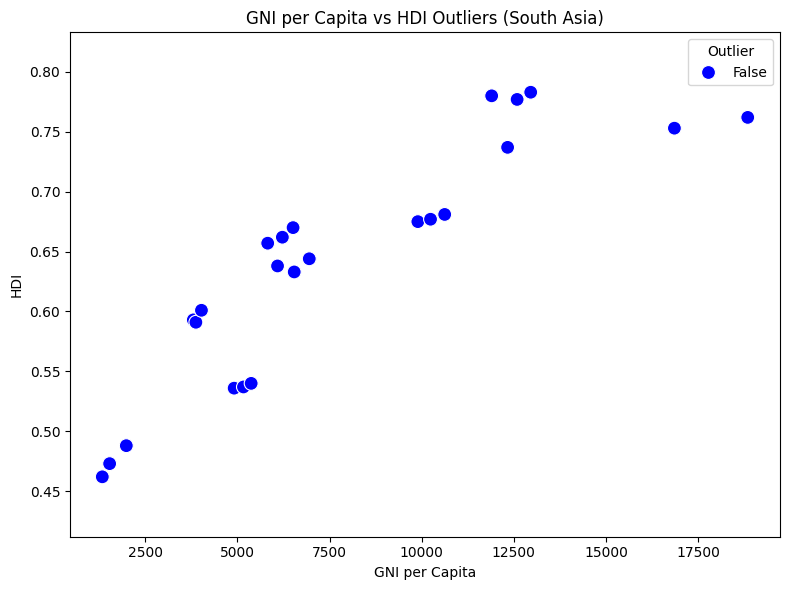


Middle East - Total Outliers: 3


,country,year,hdi,gross_inc_percap
6366,Yemen,2020,0.430,1152.015672
6367,Yemen,2021,0.425,1112.162989
6368,Yemen,2022,0.424,1105.763435


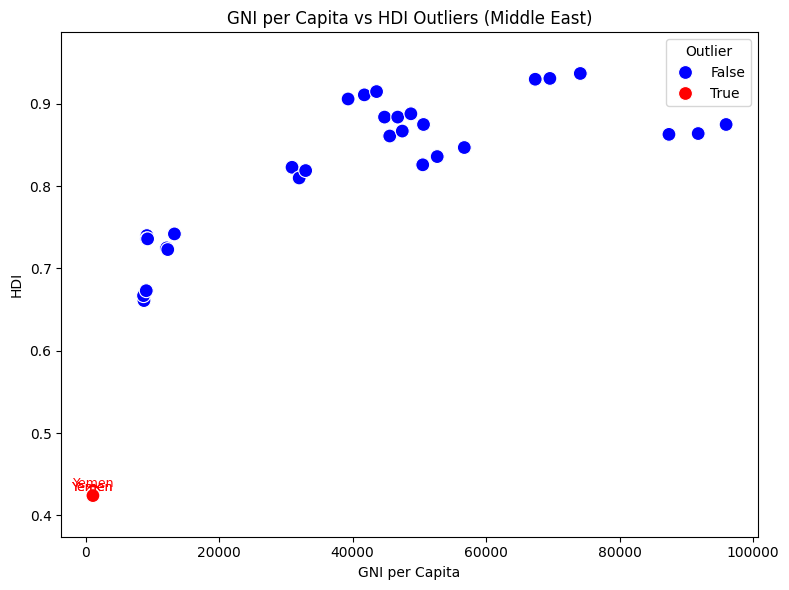

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


for region_name, df in [("South Asia", dataset_sa), ("Middle East", dataset_me)]:
    df = df.copy()


    df["HDI_outlier"] = detect_outliers(df["hdi"])
    df["GNI_outlier"] = detect_outliers(df["gross_inc_percap"])


    df["Outlier"] = (df["HDI_outlier"] | df["GNI_outlier"]).astype(bool)


    num_outliers = df["Outlier"].sum()
    print(f"\n{region_name} - Total Outliers: {num_outliers}")


    display(df[df["Outlier"]][["country", "year", "hdi", "gross_inc_percap"]])

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="gross_inc_percap",
        y="hdi",
        hue="Outlier",
        palette={False: "blue", True: "red"},
        s=100
    )

    # Label each outlier
    for _, row in df[df["Outlier"]].iterrows():
        plt.text(row["gross_inc_percap"], row["hdi"] + 0.005, row["country"],
                 horizontalalignment='center', fontsize=9, color="red")

    # Auto-scale y-axis
    plt.ylim(df["hdi"].min() - 0.05, df["hdi"].max() + 0.05)
    plt.title(f"GNI per Capita vs HDI Outliers ({region_name})")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.legend(title="Outlier")
    plt.tight_layout()
    plt.show()